# Imports

In [1]:
import pandas as pd
import seaborn as sns

# Handwritten local modules
from sig2kmer import degenerate_protein_chatgpt

import sourmash

## Try aligning dayhoff versions of CED9 and BCL2

In [2]:
ced9_seq = "MTRCTADNSLTNPAYRRRTMATGEMKEFLGIKGTEPTDFGINSDAQDLPSPSRQASTRRMSIGESIDGKINDWEEPRLDIEGFVVDYFTHRIRQNGMEWFGAPGLPCGVQPEHEMMRVMGTIFEKKHAENFETFCEQLLAVPRISFSLYQDVVRTVGNAQTDQCPMSYGRLIGLISFGGFVAAKMMESVELQGQVRNLFVYTSLFIKTRIRNNWKEHNRSWDDFMTLGKQMKEDYERAEAEKVGRRKQNRRWSMIGAGVTAGAIGIVGVVVCGRMMFSLK"
bcl2_seq = "MAHAGRTGYDNREIVMKYIHYKLSQRGYEWDAGDVGAAPPGAAPAPGIFSSQPGHTPHPAASRDPVARTSPLQTPAAPGAAAGPALSPVPPVVHLTLRQAGDDFSRRYRRDFAEMSSQLHLTPFTARGRFATVVEELFRDGVNWGRIVAFFEFGGVMCVESVNREMSPLVDNIALWMTEYLNRHLHTWIQDNGGWDAFVELYGPSMRPLFDFSWLSLKTLLSLALVGACITLGAYLGHK"

In [3]:
ced9_seq_dayhoff = degenerate_protein_chatgpt(ced9_seq, "dayhoff")
ced9_seq_dayhoff

'ebdabbccbebcbbfdddbebbbcedcfebedbbcbbcfbecbcbccebbbbdcbbbddebebcbecbdeccfccbdececbfeecffbddedccbecffbbbbebabecbcdceedeebbefcdddbccfcbfacceebebdebfbefcceedbebcbcbccabebfbdeebeebfbbfebbdeecbececbcedcefefbbefedbdedccfdcdcdbfccfebebdcedccfcdbcbcdebdddccddfbeebbbebbbbebeebeeeabdeefbed'

In [4]:
bcl2_seq_dayhoff = degenerate_protein_chatgpt(bcl2_seq, "dayhoff")
bcl2_seq_dayhoff

'ebdbbdbbfccdceeedfedfdebcdbfcfcbbcebbbbbbbbbbbbefbbcbbdbbdbbbbdcbebdbbbecbbbbbbbbbbbbebbebbeedebedcbbccfbddfddcfbcebbcedebbfbbdbdfbbeeccefdcbecfbdeebffcfbbeeaecbecdcebbeeccebefebcfecddedbfecccbbfcbfecefbbbedbefcfbfebedbeebebeebbaebebbfebdd'

In [5]:
def kmerize(sequence, ksize):
    kmers = [sequence[i : (i + ksize)] for i in range(len(sequence) - ksize + 1)]
    return kmers


def calculate_jaccard(set1, set2):
    union = set1.union(set2)
    intersection = set1.intersection(set2)
    return len(intersection) / len(union)

# The ksizes value was dropped from (5,31) using the hp dataset

In [6]:
ksizes = range(2, 15)

lines = []

for ksize in ksizes:
    bcl2_dayhoff_kmers = kmerize(bcl2_seq_dayhoff, ksize)
    ced9_dayhoff_kmers = kmerize(ced9_seq_dayhoff, ksize)

    bcl2_dayhoff_kmers_set = set(bcl2_dayhoff_kmers)
    ced9_dayhoff_kmers_set = set(ced9_dayhoff_kmers)

    jaccard = calculate_jaccard(bcl2_dayhoff_kmers_set, ced9_dayhoff_kmers_set)
    lines.append(
        [
            "BCL2",
            "ced9",
            "dayhoff",
            ksize,
            jaccard,
            len(bcl2_dayhoff_kmers),
            len(bcl2_dayhoff_kmers_set),
            len(ced9_dayhoff_kmers),
            len(ced9_dayhoff_kmers_set),
        ]
    )
jaccard_df = pd.DataFrame(
    lines,
    columns=[
        "query",
        "match",
        "moltype",
        "ksize",
        "jaccard",
        "query_n_kmers",
        "query_n_unique_kmers",
        "match_n_kmers",
        "match_n_unique_kmers",
    ],
)
jaccard_df

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,match_n_kmers,match_n_unique_kmers
0,BCL2,ced9,dayhoff,2,0.818182,238,28,279,32
1,BCL2,ced9,dayhoff,3,0.606061,237,100,278,112
2,BCL2,ced9,dayhoff,4,0.198113,236,172,277,209
3,BCL2,ced9,dayhoff,5,0.055046,235,204,276,256
4,BCL2,ced9,dayhoff,6,0.016667,234,215,275,273
5,BCL2,ced9,dayhoff,7,0.002033,233,219,274,274
6,BCL2,ced9,dayhoff,8,0.000000,232,222,273,273
7,BCL2,ced9,dayhoff,9,0.000000,231,223,272,272
8,BCL2,ced9,dayhoff,10,0.000000,230,224,271,271
9,BCL2,ced9,dayhoff,11,0.000000,229,225,270,270


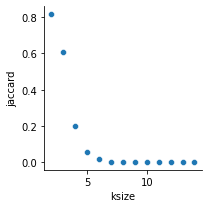

In [7]:
sns.relplot(data=jaccard_df, x="ksize", y="jaccard", height=3)

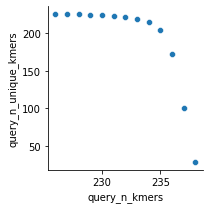

In [8]:
sns.relplot(data=jaccard_df, x="query_n_kmers", y="query_n_unique_kmers", height=3)

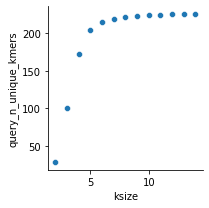

In [9]:
sns.relplot(data=jaccard_df, x="ksize", y="query_n_unique_kmers", height=3)

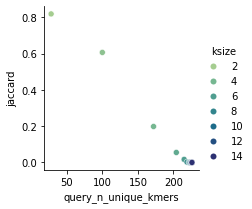

In [10]:
sns.relplot(
    data=jaccard_df,
    x="query_n_unique_kmers",
    y="jaccard",
    height=3,
    hue="ksize",
    palette="crest",
)

# This value was dropped from .5 in the hp dataset

In [11]:
jaccard_df.query("jaccard > 0.01")

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,match_n_kmers,match_n_unique_kmers
0,BCL2,ced9,dayhoff,2,0.818182,238,28,279,32
1,BCL2,ced9,dayhoff,3,0.606061,237,100,278,112
2,BCL2,ced9,dayhoff,4,0.198113,236,172,277,209
3,BCL2,ced9,dayhoff,5,0.055046,235,204,276,256
4,BCL2,ced9,dayhoff,6,0.016667,234,215,275,273


# Functionalize the analysis for any two sequences

Thanks Claude

In [38]:
from typing import Dict, List, Set

import pandas as pd


class Sequence:
    def __init__(self, sequence: str, name: str, moltype: str = "dayhoff"):
        self.sequence = sequence
        self.name = name
        self.moltype = moltype
        self.processed_seq = self._process_sequence()

    def _process_sequence(self) -> str:
        return degenerate_protein_chatgpt(self.sequence, self.moltype)

    def get_kmers(self, k: int) -> List[str]:
        return [
            self.processed_seq[i : i + k]
            for i in range(len(self.processed_seq) - k + 1)
        ]


class KmerAnalyzer:
    def __init__(self, seq1: Sequence, seq2: Sequence):
        self.seq1 = seq1
        self.seq2 = seq2

    def calculate_jaccard(self, kmer_set1: Set[str], kmer_set2: Set[str]) -> float:
        intersection = len(kmer_set1.intersection(kmer_set2))
        union = len(kmer_set1.union(kmer_set2))
        return intersection / union if union > 0 else 0.0

    def analyze_kmer_range(self, start_k: int, end_k: int) -> pd.DataFrame:
        results = []
        for k in range(start_k, end_k + 1):
            results.append(self._analyze_single_k(k))
        return pd.DataFrame(results, columns=self._get_column_names())

    def get_intersecting_kmer_positions(self, kmers1, kmers2, kmer_set1, kmer_set2):
        intersection = kmer_set1.intersection(kmer_set2)

        positions1 = []
        positions2 = []
        for kmer in intersection:
            positions1.append([kmers1.index(kmer), kmer])
            positions2.append([kmers2.index(kmer), kmer])

        positions1 = sorted(positions1, key=lambda x: x[0])
        positions2 = sorted(positions2, key=lambda x: x[0])
        return positions1, positions2

    def _analyze_single_k(self, k: int) -> List:
        kmers1 = self.seq1.get_kmers(k)
        kmers2 = self.seq2.get_kmers(k)
        set1 = set(kmers1)
        set2 = set(kmers2)

        pos1, pos2 = self.get_intersecting_kmer_positions(kmers1, kmers2, set1, set2)

        return [
            self.seq1.name,
            self.seq2.name,
            self.seq1.moltype,
            k,
            self.calculate_jaccard(set1, set2),
            len(kmers1),
            len(set1),
            pos1,
            len(kmers2),
            len(set2),
            pos2,
        ]

    def _get_column_names(self) -> List[str]:
        return [
            "query",
            "match",
            "moltype",
            "ksize",
            "jaccard",
            "query_n_kmers",
            "query_n_unique_kmers",
            "query_intersection_positions",
            "match_n_kmers",
            "match_n_unique_kmers",
            "match_intersection_positions",
        ]


# Example usage
def compare_sequences(
    seq1_str: str,
    seq2_str: str,
    seq1_name: str,
    seq2_name: str,
    start_k: int = 5,
    end_k: int = 30,
) -> pd.DataFrame:
    seq1 = Sequence(seq1_str, seq1_name)
    seq2 = Sequence(seq2_str, seq2_name)
    analyzer = KmerAnalyzer(seq1, seq2)
    return analyzer.analyze_kmer_range(start_k, end_k)


# Usage example:
df = compare_sequences(ced9_seq, bcl2_seq, "CED9", "BCL2", end_k=10)
df

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,query_intersection_positions,match_n_kmers,match_n_unique_kmers,match_intersection_positions
0,CED9,BCL2,dayhoff,5,0.055046,276,256,"[[21, bbced], [27, febed], [28, ebedb], [32, b...",235,204,"[[10, cdcee], [24, cdbfc], [33, cebbb], [34, e..."
1,CED9,BCL2,dayhoff,6,0.016667,275,273,"[[27, febedb], [46, cebbbb], [48, bbbbdc], [49...",234,215,"[[33, cebbbb], [58, bbbbdc], [59, bbbdcb], [81..."
2,CED9,BCL2,dayhoff,7,0.002033,274,274,"[[48, bbbbdcb]]",233,219,"[[58, bbbbdcb]]"
3,CED9,BCL2,dayhoff,8,0.000000,273,273,[],232,222,[]
4,CED9,BCL2,dayhoff,9,0.000000,272,272,[],231,223,[]
5,CED9,BCL2,dayhoff,10,0.000000,271,271,[],230,224,[]


In [39]:
kmer5ced9bcl2intersection = df.iloc[0]['query_intersection_positions']
kmer5ced9bcl2intersection

[[21, 'bbced'],
 [27, 'febed'],
 [28, 'ebedb'],
 [32, 'bbcbb'],
 [46, 'cebbb'],
 [47, 'ebbbb'],
 [48, 'bbbbd'],
 [49, 'bbbdc'],
 [50, 'bbdcb'],
 [94, 'cbecf'],
 [100, 'bbbbe'],
 [101, 'bbbeb'],
 [111, 'cdcee'],
 [137, 'eebeb'],
 [167, 'fbdee'],
 [168, 'bdeeb'],
 [171, 'ebeeb'],
 [177, 'bbfeb'],
 [185, 'ecbec'],
 [217, 'cdbfc'],
 [252, 'beebb'],
 [256, 'bbebb'],
 [262, 'bebee'],
 [264, 'beebe']]

In [40]:
kmer5ced9bcl2match = df.iloc[0]['match_intersection_positions']
kmer5ced9bcl2match

[[10, 'cdcee'],
 [24, 'cdbfc'],
 [33, 'cebbb'],
 [34, 'ebbbb'],
 [43, 'bbbbe'],
 [49, 'bbcbb'],
 [58, 'bbbbd'],
 [59, 'bbbdc'],
 [60, 'bbdcb'],
 [82, 'bbbeb'],
 [83, 'bbebb'],
 [115, 'bbced'],
 [139, 'cbecf'],
 [143, 'fbdee'],
 [144, 'bdeeb'],
 [158, 'ecbec'],
 [213, 'febed'],
 [214, 'ebedb'],
 [218, 'beebe'],
 [219, 'eebeb'],
 [221, 'bebee'],
 [222, 'ebeeb'],
 [223, 'beebb'],
 [232, 'bbfeb']]

In [41]:
kmer6ced9bcl2intersection = df.iloc[1]['query_intersection_positions']
kmer6ced9bcl2intersection

[[27, 'febedb'],
 [46, 'cebbbb'],
 [48, 'bbbbdc'],
 [49, 'bbbdcb'],
 [100, 'bbbbeb'],
 [167, 'fbdeeb'],
 [255, 'bbbebb'],
 [262, 'bebeeb']]

In [42]:
kmer6ced9bcl2match = df.iloc[1]['match_intersection_positions']
kmer6ced9bcl2match

[[33, 'cebbbb'],
 [58, 'bbbbdc'],
 [59, 'bbbdcb'],
 [81, 'bbbbeb'],
 [82, 'bbbebb'],
 [143, 'fbdeeb'],
 [213, 'febedb'],
 [221, 'bebeeb']]

In [43]:
df.query("ksize >= 5 and ksize <= 6")

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,query_intersection_positions,match_n_kmers,match_n_unique_kmers,match_intersection_positions
0,CED9,BCL2,dayhoff,5,0.055046,276,256,"[[21, bbced], [27, febed], [28, ebedb], [32, b...",235,204,"[[10, cdcee], [24, cdbfc], [33, cebbb], [34, e..."
1,CED9,BCL2,dayhoff,6,0.016667,275,273,"[[27, febedb], [46, cebbbb], [48, bbbbdc], [49...",234,215,"[[33, cebbbb], [58, bbbbdc], [59, bbbdcb], [81..."


### Make Sourmash signatures for CED9, BCL2

#### CED9

In [23]:
ced9_seq

'MTRCTADNSLTNPAYRRRTMATGEMKEFLGIKGTEPTDFGINSDAQDLPSPSRQASTRRMSIGESIDGKINDWEEPRLDIEGFVVDYFTHRIRQNGMEWFGAPGLPCGVQPEHEMMRVMGTIFEKKHAENFETFCEQLLAVPRISFSLYQDVVRTVGNAQTDQCPMSYGRLIGLISFGGFVAAKMMESVELQGQVRNLFVYTSLFIKTRIRNNWKEHNRSWDDFMTLGKQMKEDYERAEAEKVGRRKQNRRWSMIGAGVTAGAIGIVGVVVCGRMMFSLK'

In [24]:
%%file test-data/ced9.fasta
>ced9
MTRCTADNSLTNPAYRRRTMATGEMKEFLGIKGTEPTDFGINSDAQDLPSPSRQASTRRMSIGESIDGKINDWEEPRLDIEGFVVDYFTHRIRQNGMEWFGAPGLPCGVQPEHEMMRVMGTIFEKKHAENFETFCEQLLAVPRISFSLYQDVVRTVGNAQTDQCPMSYGRLIGLISFGGFVAAKMMESVELQGQVRNLFVYTSLFIKTRIRNNWKEHNRSWDDFMTLGKQMKEDYERAEAEKVGRRKQNRRWSMIGAGVTAGAIGIVGVVVCGRMMFSLK

Overwriting test-data/ced9.fasta


#### P66

In [25]:
bcl2_seq

'MAHAGRTGYDNREIVMKYIHYKLSQRGYEWDAGDVGAAPPGAAPAPGIFSSQPGHTPHPAASRDPVARTSPLQTPAAPGAAAGPALSPVPPVVHLTLRQAGDDFSRRYRRDFAEMSSQLHLTPFTARGRFATVVEELFRDGVNWGRIVAFFEFGGVMCVESVNREMSPLVDNIALWMTEYLNRHLHTWIQDNGGWDAFVELYGPSMRPLFDFSWLSLKTLLSLALVGACITLGAYLGHK'

In [26]:
%%file test-data/bcl2.fasta
>bcl2
MAHAGRTGYDNREIVMKYIHYKLSQRGYEWDAGDVGAAPPGAAPAPGIFSSQPGHTPHPAASRDPVARTSPLQTPAAPGAAAGPALSPVPPVVHLTLRQAGDDFSRRYRRDFAEMSSQLHLTPFTARGRFATVVEELFRDGVNWGRIVAFFEFGGVMCVESVNREMSPLVDNIALWMTEYLNRHLHTWIQDNGGWDAFVELYGPSMRPLFDFSWLSLKTLLSLALVGACITLGAYLGHK

Overwriting test-data/bcl2.fasta


### Compute signatures

In [27]:
ksizes = 5, 6
ced9_bcl2_fastas = {"ced9": "test-data/ced9.fasta", "bcl2": "test-data/bcl2.fasta"}
ced9_bcl2_sigfiles = {}


for ksize in ksizes:
    for name, fasta in ced9_bcl2_fastas.items():
        param_string = f"dayhoff,scaled=1,k={ksize}"
        sig = f"test-data/{name}.dayhoff.k{ksize}.sig"
        ! sourmash sketch protein -p $param_string --name $name $fasta -o $sig
        ced9_bcl2_sigfiles[(name, ksize)] = sig



== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/ced9.fasta

Computing a total of 1 signature(s) for each input.

... reading sequences from test-data/ced9.fasta

... test-data/ced9.fasta 1 sequences

calculated 1 signature for 1 sequences taken from 1 files

saved 1 signature(s) to 'test-data/ced9.dayhoff.k5.sig'


== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/bcl2.fasta

Computing a total of 1 signature(s) for each input.

... reading sequences from test-data/bcl2.fasta

... test-data/bcl2.fasta 1 sequences

calculated 1 signature for 1 sequences taken from 1 files

saved 1 signature(s) to 'test-data/bcl2.dayhoff.k5.sig'


== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/ced9.fasta

C

### Load Signatures

In [28]:
ksizes = 5, 6
ced9_bcl2_sigs = dict.fromkeys(ksizes, {})

for (name, ksize), sigfile in ced9_bcl2_sigfiles.items():
    ced9_bcl2_sigs[ksize][name] = list(sourmash.load_file_as_signatures(sigfile))[0]
ced9_bcl2_sigs

{5: {'ced9': SourmashSignature('ced9', 1dd6b6f2),
  'bcl2': SourmashSignature('bcl2', 49f32c24)},
 6: {'ced9': SourmashSignature('ced9', 1dd6b6f2),
  'bcl2': SourmashSignature('bcl2', 49f32c24)}}

### Show SigSeq Alignment

In [20]:
from sigseq import SigSeq

for ksize, sigs in ced9_bcl2_sigs.items():
    print(f"ksize: {ksize}")

    ced9_sigseq = SigSeq(sigs["ced9"], ced9_seq)
    bcl2_sigseq = SigSeq(sigs["bcl2"], bcl2_seq)

    try:
        ced9_sigseq.display_alignment(bcl2_sigseq)
    except ValueError as e:
        print(e)
        continue

ksize: 8


IndexError: list index out of range

In [21]:
ced9_sigseq.display_alignment(bcl2_sigseq)

IndexError: list index out of range

### 


## P66 and CD47

From [P66 is a bacterial mimic of CD47 that binds the anti-phagocytic receptor SIRPα and facilitates macrophage evasion by Borrelia burgdorferi](https://www.biorxiv.org/content/10.1101/2024.04.29.591704v1.full)

> Protein alignments were performed through Uniprot (www.uniprot.org) using the Clustal Omega Program23,24. The following proteins were used for analysis: CD47_HUMAN (Q08722), and H7C7N8(P66)_BORBU (H7C7N8).



In [29]:
CD47_HUMAN = "MWPLVAALLLGSACCGSAQLLFNKTKSVEFTFCNDTVVIPCFVTNMEAQNTTEVYVKWKFKGRDIYTFDGALNKSTVPTDFSSAKIEVSQLLKGDASLKMDKSDAVSHTGNYTCEVTELTREGETIIELKYRVVSWFSPNENILIVIFPIFAILLFWGQFGIKTLKYRSGGMDEKTIALLVAGLVITVIVIVGAILFVPGEYSLKNATGLGLIVTSTGILILLHYYVFSTAIGLTSFVIAILVIQVIAYILAVVGLSLCIAACIPMHGPLLISGLSILALAQLLGLVYMKFVASNQKTIQPPRKAVEEPLNAFKESKGMMNDE"

In [30]:
H7C7N8_BORBU = "MKSHILYKLIIFLTTSAAIFAADALKEKDIFKINPWMPTFGFENTSEFRLDMDELVPGFENKSKITIKLKPFEANPELGKDDPFSAYIKVEDLALKAEGKKGDQFKIDVGDITAQINMYDFFIKISTMTDFDFNKESLFSFAPMTGFKSTYYGFPSNDRAVRGTILARGTSKNIGTIQLGYKLPKLDLTFAIGGTGTGNRNQENDKDTPYNKTYQGILYGIQATWKPIKNLLDQNEDTKSVIAETPFELNFGLSGAYGNETFNNSSITYSLKDKSVVGNDLLSPTLSNSAILASFGAKYKLGLTKINDKNTYLILQMGTDFGIDPFASDFSIFGHISKAANFKKETPSDPNKKAEIFDPNGNALNFSKNTELGIAFSTGASIGFAWNKDTGEKESWAIKGSDSYSTRLFGEQDKKSGVALGISYGQNLYRSKDTEKRLKTISENAFQSLNVEISSYEDNKKGIINGLGWITSIGLYDILRQKSVENYPTTISSTTENNQTEQSSTSTKTTTPNLTFEDAMKLGLALYLDYAIPIASISTEAYVVPYIGAYILGPSNKLSSDATKIYLKTGLSLEKLIRFTTISLGWDSNNIIELANKNTNNAAIGSAFLQFKIAYSGS"

In [44]:
p66_cd47_df = compare_sequences(CD47_HUMAN, H7C7N8_BORBU, "CD47", "p66",end_k=10)
p66_cd47_df

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,query_intersection_positions,match_n_kmers,match_n_unique_kmers,match_intersection_positions
0,CD47,p66,dayhoff,5,0.098266,319,269,"[[2, beebb], [8, eebbb], [15, bbbce], [26, bec...",614,491,"[[9, eefeb], [10, efebb], [12, ebbbb], [14, bb..."
1,CD47,p66,dayhoff,6,0.026838,318,294,"[[46, cbccbb], [74, bbebbc], [76, ebbcfb], [83...",613,586,"[[9, eefebb], [75, bcebdc], [105, decebc], [10..."
2,CD47,p66,dayhoff,7,0.006579,317,306,"[[84, decebce], [105, ebdbbcf], [197, ebbcfbe]...",612,612,"[[105, decebce], [154, bbccdbe], [159, bedbbee..."
3,CD47,p66,dayhoff,8,0.000000,316,314,[],611,611,[]
4,CD47,p66,dayhoff,9,0.000000,315,315,[],610,610,[]
5,CD47,p66,dayhoff,10,0.000000,314,314,[],609,609,[]


In [45]:
kmer5p66cd47intersection = df.iloc[0]['query_intersection_positions']
kmer5p66cd47intersection

[[21, 'bbced'],
 [27, 'febed'],
 [28, 'ebedb'],
 [32, 'bbcbb'],
 [46, 'cebbb'],
 [47, 'ebbbb'],
 [48, 'bbbbd'],
 [49, 'bbbdc'],
 [50, 'bbdcb'],
 [94, 'cbecf'],
 [100, 'bbbbe'],
 [101, 'bbbeb'],
 [111, 'cdcee'],
 [137, 'eebeb'],
 [167, 'fbdee'],
 [168, 'bdeeb'],
 [171, 'ebeeb'],
 [177, 'bbfeb'],
 [185, 'ecbec'],
 [217, 'cdbfc'],
 [252, 'beebb'],
 [256, 'bbebb'],
 [262, 'bebee'],
 [264, 'beebe']]

In [46]:
kmer5p66cd47match = df.iloc[0]['match_intersection_positions']
kmer5p66cd47match

[[10, 'cdcee'],
 [24, 'cdbfc'],
 [33, 'cebbb'],
 [34, 'ebbbb'],
 [43, 'bbbbe'],
 [49, 'bbcbb'],
 [58, 'bbbbd'],
 [59, 'bbbdc'],
 [60, 'bbdcb'],
 [82, 'bbbeb'],
 [83, 'bbebb'],
 [115, 'bbced'],
 [139, 'cbecf'],
 [143, 'fbdee'],
 [144, 'bdeeb'],
 [158, 'ecbec'],
 [213, 'febed'],
 [214, 'ebedb'],
 [218, 'beebe'],
 [219, 'eebeb'],
 [221, 'bebee'],
 [222, 'ebeeb'],
 [223, 'beebb'],
 [232, 'bbfeb']]

In [47]:
kmer6p66cd47intersection = df.iloc[1]['query_intersection_positions']
kmer6p66cd47intersection

[[27, 'febedb'],
 [46, 'cebbbb'],
 [48, 'bbbbdc'],
 [49, 'bbbdcb'],
 [100, 'bbbbeb'],
 [167, 'fbdeeb'],
 [255, 'bbbebb'],
 [262, 'bebeeb']]

In [48]:
kmer6p66cd47match = df.iloc[1]['match_intersection_positions']
kmer6p66cd47match

[[33, 'cebbbb'],
 [58, 'bbbbdc'],
 [59, 'bbbdcb'],
 [81, 'bbbbeb'],
 [82, 'bbbebb'],
 [143, 'fbdeeb'],
 [213, 'febedb'],
 [221, 'bebeeb']]


### Q: Where does P66 bind CD47? A: 181-187aa

> Utilizing a p66-deficient B. burgdorferi strain of B31-A3 (Δp66) we determined that P66 is required for CV1-G4 surface binding (Figure 2A). We next sought to determine residues on P66 critical for SIRPɑ interaction. We have previously demonstrated that two aspartic acid residues, D184 and D186, on a predicted extracellular loop of P66 (181–187) are required for integrin binding19. B. burgdorferi expressing the mutant D184A and D186A, p66D184A,D186A, or loss of the loop, p66Δ181−187, demonstrated loss of CV1-G4 binding (Figure 2A). Consistent to previous structure predictions, these sites map to an unstructured extracellular loop on a structure of P66 generated by Alphafold2 (Figure 2B and Extended Data 2A). We postulate this region is also required for SIRPɑ binding. Importantly, while these residues are critical for binding integrins and P66, loss of this loop or mutation of the two aspartic acid residues does not affect P66 cell surface localization19.


In [25]:
p66_binding_positions = set(range(181, 188))

overlapping_p66_cd47_mimickry = [
    True if any(i in p66_binding_positions for i, kmer in positions) else False
    for positions in p66_cd47_df.match_intersection_positions
]
overlapping_p66_cd47_mimickry

[True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [26]:
p66_cd47_df.loc[overlapping_p66_cd47_mimickry]

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,query_intersection_positions,match_n_kmers,match_n_unique_kmers,match_intersection_positions
0,CD47,p66,dayhoff,5,0.098266,319,269,"[[2, beebb], [8, eebbb], [15, bbbce], [26, bec...",614,491,"[[9, eefeb], [10, efebb], [12, ebbbb], [14, bb..."
1,CD47,p66,dayhoff,6,0.026838,318,294,"[[46, cbccbb], [74, bbebbc], [76, ebbcfb], [83...",613,586,"[[9, eefebb], [75, bcebdc], [105, decebc], [10..."


### Make Sourmash signatures for P66, CD47

#### CD47

In [27]:
%%file test-data/cd47.fasta
>CD47_HUMAN
MWPLVAALLLGSACCGSAQLLFNKTKSVEFTFCNDTVVIPCFVTNMEAQNTTEVYVKWKFKGRDIYTFDGALNKSTVPTDFSSAKIEVSQLLKGDASLKMDKSDAVSHTGNYTCEVTELTREGETIIELKYRVVSWFSPNENILIVIFPIFAILLFWGQFGIKTLKYRSGGMDEKTIALLVAGLVITVIVIVGAILFVPGEYSLKNATGLGLIVTSTGILILLHYYVFSTAIGLTSFVIAILVIQVIAYILAVVGLSLCIAACIPMHGPLLISGLSILALAQLLGLVYMKFVASNQKTIQPPRKAVEEPLNAFKESKGMMNDE

Overwriting test-data/cd47.fasta


#### P66

In [28]:
%%file test-data/p66.fasta
>P66_H7C7N8_BORBU
MKSHILYKLIIFLTTSAAIFAADALKEKDIFKINPWMPTFGFENTSEFRLDMDELVPGFENKSKITIKLKPFEANPELGKDDPFSAYIKVEDLALKAEGKKGDQFKIDVGDITAQINMYDFFIKISTMTDFDFNKESLFSFAPMTGFKSTYYGFPSNDRAVRGTILARGTSKNIGTIQLGYKLPKLDLTFAIGGTGTGNRNQENDKDTPYNKTYQGILYGIQATWKPIKNLLDQNEDTKSVIAETPFELNFGLSGAYGNETFNNSSITYSLKDKSVVGNDLLSPTLSNSAILASFGAKYKLGLTKINDKNTYLILQMGTDFGIDPFASDFSIFGHISKAANFKKETPSDPNKKAEIFDPNGNALNFSKNTELGIAFSTGASIGFAWNKDTGEKESWAIKGSDSYSTRLFGEQDKKSGVALGISYGQNLYRSKDTEKRLKTISENAFQSLNVEISSYEDNKKGIINGLGWITSIGLYDILRQKSVENYPTTISSTTENNQTEQSSTSTKTTTPNLTFEDAMKLGLALYLDYAIPIASISTEAYVVPYIGAYILGPSNKLSSDATKIYLKTGLSLEKLIRFTTISLGWDSNNIIELANKNTNNAAIGSAFLQFKIAYSGS

Overwriting test-data/p66.fasta


### Compute signatures

# This value was dropped from ksizes = 8, 9 in the hp dataset

In [149]:
ksizes = 3, 4
p66_cd47_fastas = {"p66": "test-data/p66.fasta", "cd47": "test-data/cd47.fasta"}
p66_cd47_sigfiles = {}


for ksize in ksizes:
    for name, fasta in p66_cd47_fastas.items():
        param_string = f"dayhoff,scaled=1,k={ksize}"
        sig = f"test-data/{name}.dayhoff.k{ksize}.sig"
        ! sourmash sketch protein -p $param_string --name $name $fasta -o $sig
        p66_cd47_sigfiles[(name, ksize)] = sig



== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/p66.fasta

Computing a total of 1 signature(s) for each input.

... reading sequences from test-data/p66.fasta

... test-data/p66.fasta 1 sequences

calculated 1 signature for 1 sequences taken from 1 files

saved 1 signature(s) to 'test-data/p66.dayhoff.k3.sig'


== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/cd47.fasta

Computing a total of 1 signature(s) for each input.

... reading sequences from test-data/cd47.fasta

... test-data/cd47.fasta 1 sequences

calculated 1 signature for 1 sequences taken from 1 files

saved 1 signature(s) to 'test-data/cd47.dayhoff.k3.sig'


== This is sourmash version 4.8.12. ==

== Please cite Irber et. al (2024), doi:10.21105/joss.06830. ==



computing signatures for files: test-data/p66.fasta

Comput

### Load Signatures

# This value was dropped from ksizes = 8, 9 in the hp dataset

In [169]:
ksizes = 3, 4
p66_cd47_sigs = dict.fromkeys(ksizes, {})

for (name, ksize), sigfile in p66_cd47_sigfiles.items():
    p66_cd47_sigs[ksize][name] = list(sourmash.load_file_as_signatures(sigfile))[0]
p66_cd47_sigs

{3: {'p66': SourmashSignature('p66', 06f1c759),
  'cd47': SourmashSignature('cd47', bafcd8ea)},
 4: {'p66': SourmashSignature('p66', 06f1c759),
  'cd47': SourmashSignature('cd47', bafcd8ea)}}

### SHow SigSeq Alignment

In [170]:
from sigseq import SigSeq

for ksize, sigs in p66_cd47_sigs.items():
    print(f"ksize: {ksize}")

    p66_sigseq = SigSeq(sigs["p66"], H7C7N8_BORBU)
    cd47_sigseq = SigSeq(sigs["cd47"], CD47_HUMAN)

    try:
        p66_sigseq.display_alignment(cd47_sigseq)
    except ValueError as e:
        print(e)
        continue

ksize: 3
Non-sequential indices -- Previous: 0, current: 2
ksize: 4
Non-sequential indices -- Previous: 0, current: 2


In [171]:
from sigseq import KmerStitcher, FastaHeaderHighlighter
import sigseq

In [172]:
self = cd47_sigseq
other = p66_sigseq
overlap = self.get_overlapping_kmers(other)
overlap

[(6, 'fdee', 'YKLI', 10068566436590771491),
 (8, 'eeef', 'LIIF', 224116582751336810),
 (9, 'eefe', 'IIFL', 7860449462917742889),
 (10, 'efeb', 'IFLT', 4466143379625637480),
 (11, 'febb', 'FLTT', 22856495822854259),
 (12, 'ebbb', 'LTTS', 6489788892270137876),
 (13, 'bbbb', 'TTSA', 10636871753394754362),
 (14, 'bbbb', 'TSAA', 10636871753394754362),
 (15, 'bbbe', 'SAAI', 5844270199162658202),
 (17, 'befb', 'AIFA', 12608447144368280135),
 (18, 'efbb', 'IFAA', 6737117628605503971),
 (19, 'fbbc', 'FAAD', 15487073495104592163),
 (21, 'bcbe', 'ADAL', 2582718285239245651),
 (23, 'bedc', 'ALKE', 9924122599953948134),
 (27, 'dcef', 'KDIF', 13066860520591833755),
 (32, 'ecbf', 'INPW', 7824081998478575779),
 (35, 'febb', 'WMPT', 22856495822854259),
 (36, 'ebbf', 'MPTF', 3777468906224825823),
 (39, 'fbfc', 'FGFE', 1717429840091522704),
 (42, 'ccbb', 'ENTS', 7934574478782340536),
 (43, 'cbbc', 'NTSE', 13425603466974449662),
 (44, 'bbcf', 'TSEF', 401197479395011469),
 (48, 'dece', 'RLDM', 351425926692

In [173]:
from sigseq import SigSeq

for ksize, sigs in p66_cd47_sigs.items():
    print(f"ksize: {ksize}")

    p66_sigseq = SigSeq(sigs["p66"], H7C7N8_BORBU)
    cd47_sigseq = SigSeq(sigs["cd47"], CD47_HUMAN)


ksize: 3
ksize: 4


In [174]:
p66_sigseq.display_alignment(cd47_sigseq)

ValueError: Non-sequential indices -- Previous: 0, current: 2

In [175]:
p66_sigseq.seq_encoded

'edbdeefdeeefebbbbbefbbcbedcdcefdecbfebbfbfccbbcfdececceebbfccdbdebededbfcbcbcebdccbfbbfedeccebedbcbddbccfdecebcebbcecefcffedebbebcfcfcdcbefbfbbebbfdbbffbfbbccdbedbbeebdbbbdcebbecebfdebdecebfbebbbbbbcdcccccdcbbfcdbfcbeefbecbbfdbedceecccccbdbeebcbbfcecfbebbbfbccbfccbbebfbedcdbeebcceebbbebcbbeebbfbbdfdebebdeccdcbfeeecebbcfbecbfbbcfbefbdebdbbcfddcbbbcbcddbcefcbcbcbecfbdcbcebebfbbbbbebfbfcdcbbcdcbfbedbbcbfbbdefbcccddbbebebebfbccefdbdcbcddedbebccbfcbececebbfcccddbeecbebfebbebefceedcdbeccfbbbebbbbccccbccbbbbbdbbbbcebfccbedebebefecfbebebbebbcbfeebfebbfeebbbcdebbcbbdefedbbebecdeedfbbebebfcbcceecebcdcbccbbebbbfecfdebfbbb'

In [176]:
p66_sigseq.seq

'MKSHILYKLIIFLTTSAAIFAADALKEKDIFKINPWMPTFGFENTSEFRLDMDELVPGFENKSKITIKLKPFEANPELGKDDPFSAYIKVEDLALKAEGKKGDQFKIDVGDITAQINMYDFFIKISTMTDFDFNKESLFSFAPMTGFKSTYYGFPSNDRAVRGTILARGTSKNIGTIQLGYKLPKLDLTFAIGGTGTGNRNQENDKDTPYNKTYQGILYGIQATWKPIKNLLDQNEDTKSVIAETPFELNFGLSGAYGNETFNNSSITYSLKDKSVVGNDLLSPTLSNSAILASFGAKYKLGLTKINDKNTYLILQMGTDFGIDPFASDFSIFGHISKAANFKKETPSDPNKKAEIFDPNGNALNFSKNTELGIAFSTGASIGFAWNKDTGEKESWAIKGSDSYSTRLFGEQDKKSGVALGISYGQNLYRSKDTEKRLKTISENAFQSLNVEISSYEDNKKGIINGLGWITSIGLYDILRQKSVENYPTTISSTTENNQTEQSSTSTKTTTPNLTFEDAMKLGLALYLDYAIPIASISTEAYVVPYIGAYILGPSNKLSSDATKIYLKTGLSLEKLIRFTTISLGWDSNNIIELANKNTNNAAIGSAFLQFKIAYSGS'

In [177]:
p66_sigseq.sig.minhash.ksize

4

In [178]:
cd47_sigseq.seq_encoded

'efbeebbeeebbbaabbbceefcdbdbecfbfaccbeeebafebcecbccbbcefedfdfdbdcefbfcbbecdbbebbcfbbbdecebceedbcbbedecdbcbebdbbcfbacebcebdcbcbeecedfdeebffbbccceeeeefbefbeeeffbcfbedbedfdbbbeccdbebeeebbeeebeeeeebbeefebbcfbedcbbbebeeebbbbeeeeedffefbbbebebbfeebeeeeceebfeebeebebeaebbaebedbbeeebbebeebebceebeefedfebbccdbecbbddbeccbecbfdcbdbeeccc'

In [179]:
cd47_sigseq.seq

'MWPLVAALLLGSACCGSAQLLFNKTKSVEFTFCNDTVVIPCFVTNMEAQNTTEVYVKWKFKGRDIYTFDGALNKSTVPTDFSSAKIEVSQLLKGDASLKMDKSDAVSHTGNYTCEVTELTREGETIIELKYRVVSWFSPNENILIVIFPIFAILLFWGQFGIKTLKYRSGGMDEKTIALLVAGLVITVIVIVGAILFVPGEYSLKNATGLGLIVTSTGILILLHYYVFSTAIGLTSFVIAILVIQVIAYILAVVGLSLCIAACIPMHGPLLISGLSILALAQLLGLVYMKFVASNQKTIQPPRKAVEEPLNAFKESKGMMNDE'

In [180]:
columns = ["i", "dayhoff", "protein", "hashval"]

In [181]:
p66_in_cd47_overlap = pd.DataFrame(
    cd47_sigseq.get_overlapping_kmers(p66_sigseq), columns=columns
)
print(p66_in_cd47_overlap.shape)
p66_in_cd47_overlap.head()

(295, 4)


,i,dayhoff,protein,hashval
0,6,fdee,YKLI,10068566436590771491
1,8,eeef,LIIF,224116582751336810
2,9,eefe,IIFL,7860449462917742889
3,10,efeb,IFLT,4466143379625637480
4,11,febb,FLTT,22856495822854259


In [182]:
p66_in_cd47_overlap.dayhoff.value_counts()

dayhoff
bbeb    12
bbbb    11
ebeb     7
bebb     7
bebe     7
        ..
eccc     1
cbdb     1
bdbe     1
dfde     1
eedf     1
Name: count, Length: 127, dtype: int64

In [183]:
cd47_in_p66_overlap = pd.DataFrame(
    p66_sigseq.get_overlapping_kmers(cd47_sigseq), columns=columns
)
print(cd47_in_p66_overlap.shape)
cd47_in_p66_overlap.head()

(199, 4)


,i,dayhoff,protein,hashval
0,0,efbe,MWPL,6323445226374325209
1,2,beeb,PLVA,17475210263719431112
2,3,eebb,LVAA,11038159954814081015
3,4,ebbe,VAAL,6920393162873654046
4,5,bbee,AALL,15322539958464395896


In [184]:
cd47_in_p66_overlap.dayhoff.value_counts()

dayhoff
eebb    6
bbee    5
bebe    5
bcfb    4
ebce    4
       ..
bede    1
bcbb    1
edbc    1
ceed    1
eccc    1
Name: count, Length: 127, dtype: int64

In [185]:
p66_in_cd47_overlap.merge(cd47_in_p66_overlap, on=["dayhoff", "hashval"])

,i_x,dayhoff,protein_x,hashval,i_y,protein_y
0,6,fdee,YKLI,10068566436590771491,130,YRVV
1,8,eeef,LIIF,224116582751336810,144,IVIF
2,8,eeef,LIIF,224116582751336810,152,ILLF
3,9,eefe,IIFL,7860449462917742889,194,ILFV
4,9,eefe,IIFL,7860449462917742889,285,LVYM
...,...,...,...,...,...,...
529,603,ebbb,IGSA,6489788892270137876,9,LGSA
530,603,ebbb,IGSA,6489788892270137876,213,VTST
531,605,bbfe,SAFL,6002404200797057331,234,TSFV
532,614,fbbb,YSGS,12785923314063975223,80,FSSA


### Where is jaccard > 0.5?

# This value was dropped from jaccard > 0.7 in the hp dataset

In [191]:
p66_cd47_df.query("jaccard > 0.001")

,query,match,moltype,ksize,jaccard,query_n_kmers,query_n_unique_kmers,query_intersection_positions,match_n_kmers,match_n_unique_kmers,match_intersection_positions
0,CD47,p66,dayhoff,5,0.098266,319,269,"[[2, beebb], [8, eebbb], [15, bbbce], [26, bec...",614,491,"[[9, eefeb], [10, efebb], [12, ebbbb], [14, bb..."
1,CD47,p66,dayhoff,6,0.026838,318,294,"[[46, cbccbb], [74, bbebbc], [76, ebbcfb], [83...",613,586,"[[9, eefebb], [75, bcebdc], [105, decebc], [10..."
2,CD47,p66,dayhoff,7,0.006579,317,306,"[[84, decebce], [105, ebdbbcf], [197, ebbcfbe]...",612,612,"[[105, decebce], [154, bbccdbe], [159, bedbbee..."


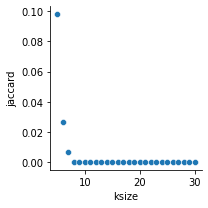

In [192]:
sns.relplot(data=p66_cd47_df, x="ksize", y="jaccard", height=3)

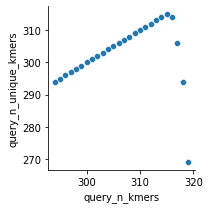

In [193]:
sns.relplot(data=p66_cd47_df, x="query_n_kmers", y="query_n_unique_kmers", height=3)

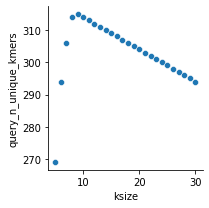

In [194]:
sns.relplot(data=p66_cd47_df, x="ksize", y="query_n_unique_kmers", height=3)

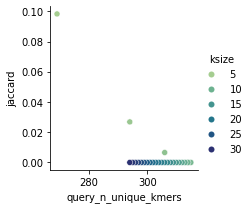

In [195]:
sns.relplot(
    data=p66_cd47_df,
    x="query_n_unique_kmers",
    y="jaccard",
    height=3,
    hue="ksize",
    palette="crest",
)